# The Newton dynamical system in a Complex Plane

For a general function $f(x)$ it may be difficult to find a solution to $f(a) = 0$. However, if $f(x) = b + mx$ is a linear function, then we may solve for $0 = f(a) = b + ma$ as $a := \frac{−b}{m}$. Newton’s method is a way to solve for $f(a) = 0$ by approximating $f(x)$ by a linear function. Newton’s method applied to polynomials has been studied extensively. However, little has been done on its application to entire functions. Newton's method for solving the equation $f(z) = 0$ generates succesive estimates for the root from the iteration:
$$z' = z -\frac {f(z)}{f'(z)}$$

Here we take $f(z) = z ^{n - 1}$ , whose roots are at $z = e^{i \theta}$ where $\theta = 2 \pi k / n$, where $k$ takes integer values from $0$ to $n-1$. It turns out that, for $n > 2$, the boundaries of the regions of the complex plane which converge to each of the roots have a complicated fractal geometry.  A structure in which the same pattern repeats
down to smaller and smaller scales ad infinitum is called a fractal. Fractals display complexity and self-similarity at all scales. 
The complex function $f(z) = z^3 - 1$ has three roots (the cube roots of $1$) : $z_1 = +1, z_2 = -1/2 + i⋅(√3)/2$, and $z_3 = -1/2 - i⋅(√3)/2$. These points are equally spaced around a unit circle. $z_{k+1} = g(z) = \frac {2}{3} z_k - \frac {1}{3z_{k^2}}$ reflects the Newton dynamical system for the function $f(z) = z^3 - 1$. The dynamical system is a geometrical description of how a set of points evolve over time given a fixed rule. It can be shown that Newton converges to a root of a function if the starting point is sufficiently close.

The goal of our project is to illustrate this particular function on a complex plane, indicating how points move in accordance with the three roots, using Python as a tool.

We will begin by importing the modules and packages that will define and implement the functions, classes, or variables that will be used over the course of this report:

In [2]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

We first look at the regions in a complex plane which converge to each of the roots. By generating a function to produce this image, we will be able to reproduce it repeatedly and study the structure at different locations and different scales, while plotting lines which track the movement of points. Polar representation will show changes occuring through squaring, reciprocal transformation, or convergence. The reciprocal transformation $(w = 1/z)$ maps the z-plane one-to-one onto the w-plane.

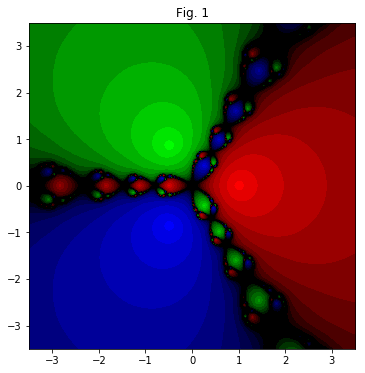

In [131]:
def MakeImage(r):                      # we will name the function "MakeImage"
    nr = 1000                          # our resolution will be 1000x1000 pixels
    nc = 1000

    x = linspace(-r, r,nc)
    y = linspace( r,-r,nr)
    X,Y = meshgrid(x,y)

    Z = X + 1j*Y

    def g(z): return 2/3*z + 1/3/z**2   # Newton map for f(z) = z^3 - 1

    # create a color image
    a = zeros((nr,nc,3),dtype=float)
    # for convenience, set up views into each color layer
    red   = a[:,:,0]
    green = a[:,:,1]
    blue  = a[:,:,2]
    
    # the following are the three roots of our function f(z) = z^3 - 1
    redroot   = 1.
    greenroot = -1/2 + 1j*sqrt(3)/2
    blueroot  = -1/2 - 1j*sqrt(3)/2

    for k in range(10):
        # add 1 to red layer at pixels where Z now close to red root, etc.
        # use boolean indexing
        red  [ abs(Z-  redroot) < .1    ] += 1    # add one to every pixel where Z now close to red root
        green[ abs(Z-greenroot) < .1    ] += 1    # add one to every pixel where Z now close to green root
        blue [ abs(Z- blueroot) < .1    ] += 1    # add one to every pixel where Z now close to blue root

        Z = g(Z)

    a /= (a.max()/255)
    a = array(a,dtype=uint8)
    return a

from scipy.misc import imsave, imshow 
plt.figure(figsize=(6,6));
plt.imshow(a,interpolation='none',extent=[-r,r,-r,r]);
plt.title("Fig. 1")
plt.xlim(-r,r);
plt.ylim(-r,r);

Each point in the plane converges to one of the three solutions of $z^3 - 1 = 0$ in $Fig. 1$. Here we have made a red-green-blue rendering which shows which root each point goes to. All points in the red region flow to the root at $z = 1$, in the green region to the root at $z = -1/2 + i⋅(√3)/2$, and in the blue region to the root at $z = -1/2 - i⋅(√3)/2$. All points that converge to a root, form a "basin of attraction" for the root. The boundary between these regions is very complicated: any circle enclosing points of two of these colors must also enclose points of the third color. When starting on the boundary points themselves, Newton's method does not converge to any root, but is chaotic.

What is interesting about $Fig. 1$ is how complicated the boundary between the different domains is, and how we can start close to the domain of one root but end up converging to a different one. We will now study the movement of points on this figure based on the Newton dynamical system.

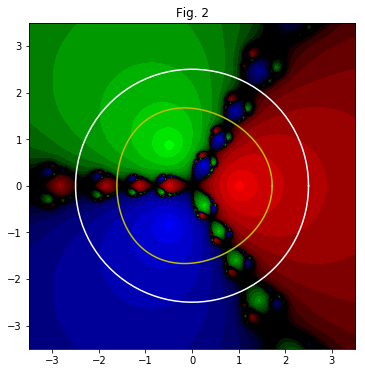

In [132]:
from scipy.misc import imsave, imshow#imsave('newtonconvergence.png',a)
r= 3.5
a = MakeImage(r)
plt.figure(figsize=(6,6));
plt.imshow(a,interpolation='none',extent=[-r,r,-r,r]);


p = 2.5                         # radius of our parametric circle
t= linspace(0,2*pi, 100)
z= p*cos(t) + 1j*p*sin(t)       # producing our parametric circle
plt.plot(z.real,z.imag, 'w');

w= g(z)                
plt.plot(w.real,w.imag, 'y');   # plotting real numbers against imaginary numbers
plt.title("Fig. 2")
plt.xlim(-r,r);
plt.ylim(-r,r);

In $Fig. 2$ we can see parametric shapes plotted onto $Fig. 1$. The outer parametric circle reflects the starting points, which evolve under a set of repeated iterations producing another series of points which then form the yellow parametric shape. A point on the white circle will travel directly to the closest point on the yellow circluar shape. The dynamical system is in effect in this figure; with the radius set a $2.5$, which is greater than $1$, the z-value that is plugged into the function $g(z) = \frac {2}{3} z_k - \frac {1}{3z_{k^2}}$ results in greater emphasis being placed on $\frac {2}{3} z_k$. This results in all the outer points being "attracted" to a set of fixed points at a fast rate.

A point that does not change under an iteration is a fixed point. All roots are fixed points. We will now show these fixed points in $Fig. 3$.

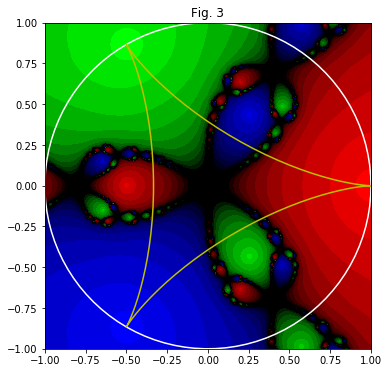

In [134]:
r = 1
a = MakeImage(r)
plt.figure(figsize=(6,6))
plt.imshow(a,interpolation='none',extent=[-r,r,-r,r]);

p = 1   # radius
t= linspace(0,2*pi, 100)
z= p*cos(t) + 1j*p*sin(t)
plt.plot(z.real,z.imag, 'w');

w= g(z)
plt.plot(w.real,w.imag, 'y');   # plotting real numbers against imaginary numbers
plt.title("Fig. 3")
plt.xlim(-r,r);
plt.ylim(-r,r);

Starting from points painted red, Newton's method converges to $1$, from points painted green to $-1/2 + i⋅(√3)/2$, and from points painted blue converge to $-1/2 - i⋅(√3)/2$. We can observe from $Fig. 3$ that these are the points where the yellow figure touches the white parametric circle. These are the fixed points, or "convergence points" and the set of all starting points will eventually “land” at a fixed point and remain there.

In $Fig. 3$ we can see the white parametric circle being divided into $4$ regions. The $3$ regions that we can see enclosed between a white arch and a yellow arch reflect the pattern in which the points will move. Each point on a white arch will travel to a point directly across from it on the yellow arch.

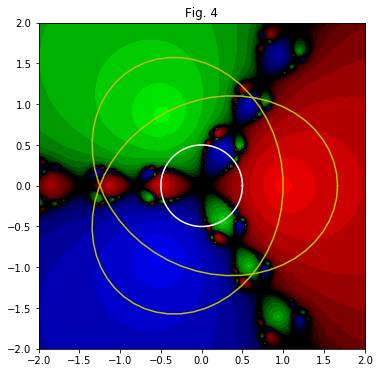

In [135]:
r = 2
a = MakeImage(r)
plt.figure(figsize=(6,6))
plt.imshow(a,interpolation='none',extent=[-r,r,-r,r]);

p = 0.5
t= linspace(0,2*pi, 100)
z= p*cos(t) + 1j*p*sin(t)
plt.plot(z.real,z.imag, 'w');

w=g(z)
plt.plot(w.real,w.imag, 'y');   # plotting real numbers against imaginary numbers
plt.title("Fig. 4")
plt.xlim(-r,r);
plt.ylim(-r,r);

$Fig. 4$ reflects a dynamical system in which the z-value is less than $1$, thus placing more emphasis on $ \frac {1}{3z_{k^2}}$ in the function $g(z)$. Points on the white parameric circle will travel to points on the yellow parametric shape but it difficult to determine the precise movement of these points based on this graph. 

Therefore, we will reduce the number of iterations and narrow down the graphing of the orbit in order to observe the distinct movement of two points in $Fig. 5$. 

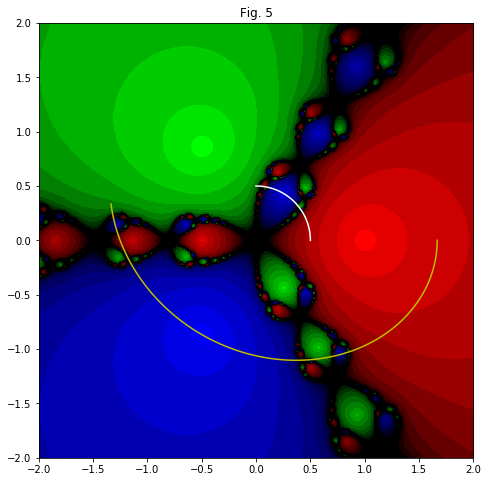

In [136]:
r = 2
a = MakeImage(r)
plt.figure(figsize=(8,8))
plt.imshow(a,interpolation='none',extent=[-r,r,-r,r]);

p = 0.5
t= linspace(0,pi/2, 100)
z= p*cos(t) + 1j*p*sin(t)
plt.plot(z.real,z.imag, 'w');

w=g(z)
plt.plot(w.real,w.imag, 'y');  # plotting real numbers against imaginary numbers
plt.title("Fig. 5")
plt.xlim(-r,r);
plt.ylim(-r,r);

In $Fig. 5$ we can see the end point of the white arch, which lies in the red region, will land on the end point of the yellow arch which also lies in the red region. The end point on the white arch, which lies in the green region, will land on the end point on the yellow arch which also lies in the green region. Each point on the white arch will correspond to a point on the yellow arch as such.

## Conclusion

The Newton fractal has three "basins of attraction"; the red, green, and blue regions as shown in the figures above. The only points that do not appear to converge to any of the three fixed points or roots, are the points on the boundary of the basins of attraction.The boundary points have a chaotic behaviour and the closer a point is to the boundary, the longer it will take to converge to one of the fixed points, as we can particularly observe in $Fig. 5$.

In $Fig. 2$ we observe that for z-values greater than $1$, the trajectory of the starting points results in faster convergence at the roots, with $z$ moving from $z$ to $z^2$. In comparison, $Fig. 4$ reflects z-values that are less than $1$ resulting in the starting points moving in a spiral trajectory and at a slower rate toward the roots, with $z$ moving from $z$ to $1/z$.

At a z-value of $1$ as seen in $Fig. 3$, we observe the three fixed points which dictate the nature of the dynamical system around them. Points within this domain are closest to the central boundary. No number of iterations can shift the position of a fixed point and once a starting point lands there, that it is where it will remain. Each of the roots $1$, $-1/2 + i⋅(√3)/2$, and $-1/2 - i⋅(√3)/2$, which lie in the red, green and blue regions respectively, are fixed points.


## References

[1] Aaron Burton, NEWTON’S METHOD AND FRACTALS, http://www.whitman.edu/mathematics/SeniorProjectArchive/2009/, 2009. Viewed 4/6/2018.